In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.dates as mdates

In [13]:
df = pd.read_csv('supermarket_sales.csv')

In [14]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

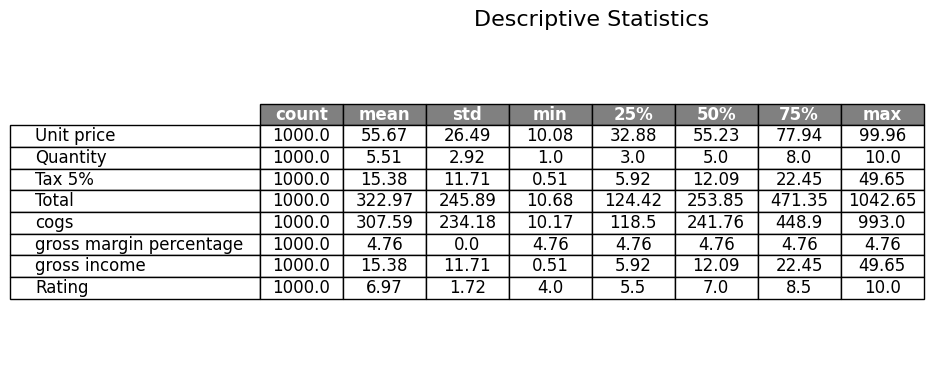

In [25]:
desc_df = df.describe().T.round(2)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Hide the axis
ax.axis('off')

# Add a table to the axis
table = ax.table(cellText=desc_df.values,
                 colLabels=desc_df.columns,
                 rowLabels=desc_df.index,
                 loc='center',
                 cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Add colors and borders to the header
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold', color='w')
        cell.set_facecolor('grey')
    else:
        cell.set_edgecolor('black')

# Add a title
ax.set_title('Descriptive Statistics', fontsize=16)

# Adjust layout
plt.tight_layout()

# Save the table as an image
plt.savefig('descriptive_statistics_numerical.png')

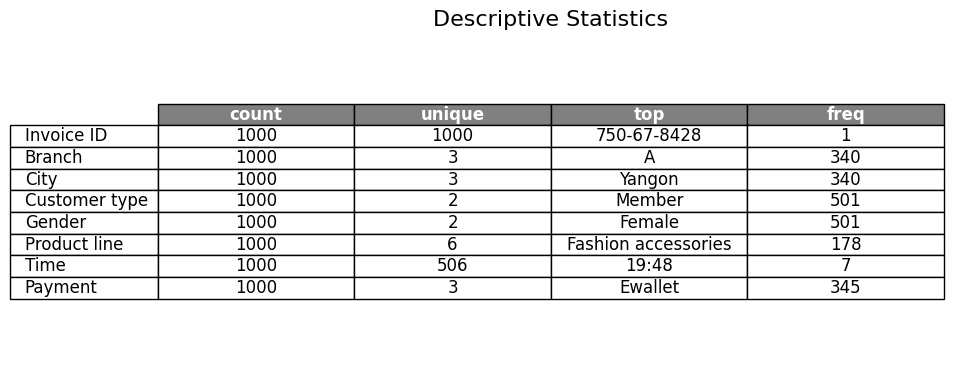

In [26]:
desc_df = df.describe(include=[object]).T.round(2)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Hide the axis
ax.axis('off')

# Add a table to the axis
table = ax.table(cellText=desc_df.values,
                 colLabels=desc_df.columns,
                 rowLabels=desc_df.index,
                 loc='center',
                 cellLoc='center')

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Add colors and borders to the header
for key, cell in table.get_celld().items():
    if key[0] == 0:
        cell.set_text_props(weight='bold', color='w')
        cell.set_facecolor('grey')
    else:
        cell.set_edgecolor('black')

# Add a title
ax.set_title('Descriptive Statistics', fontsize=16)

# Adjust layout
plt.tight_layout()

# Save the table as an image
plt.savefig('descriptive_statistics_categorical.png')

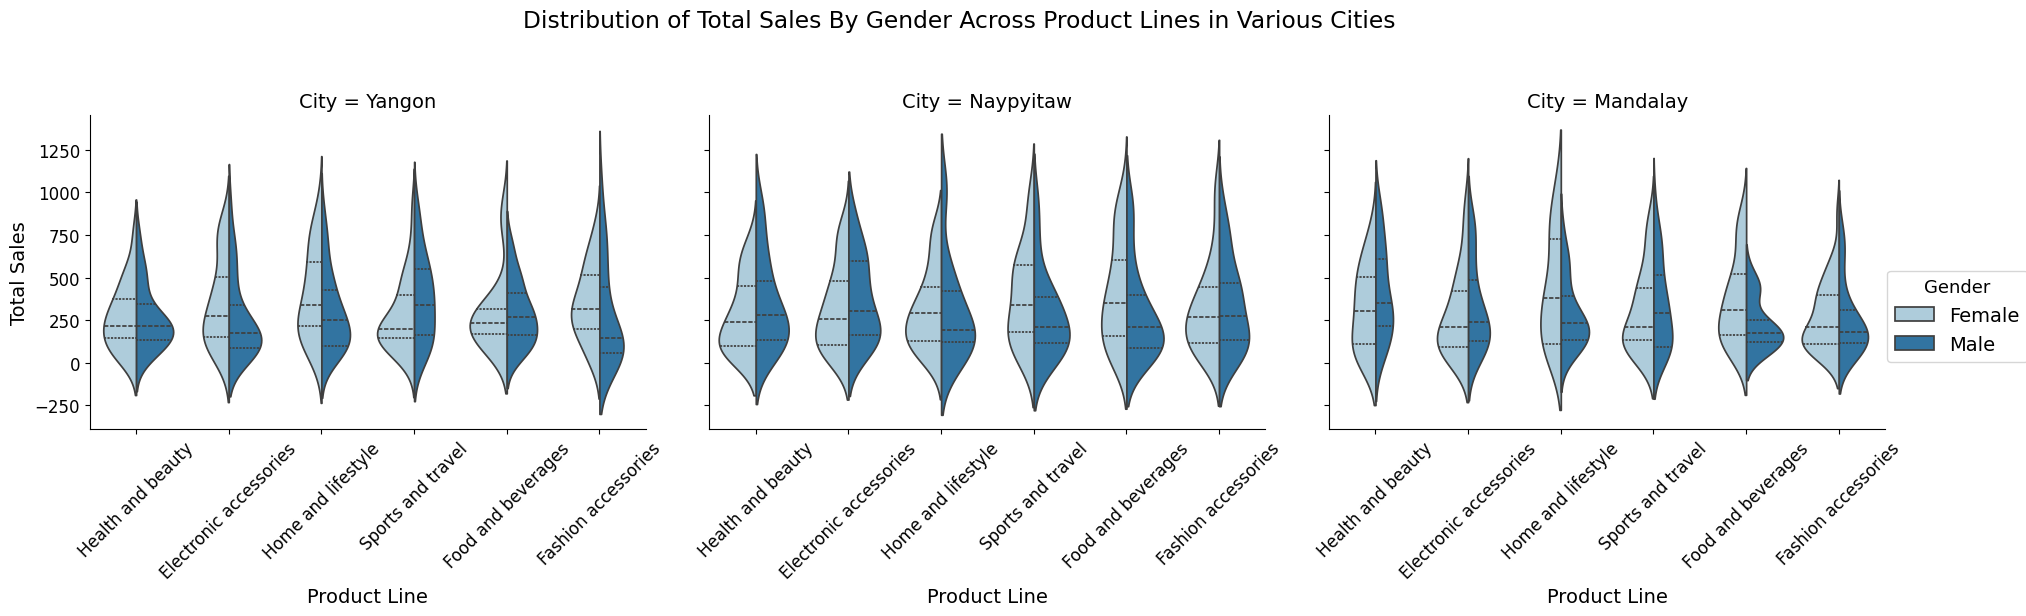

In [19]:
plt.rcParams.update({'font.size': 14, 'axes.labelsize': 14, 'axes.titlesize': 16, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'legend.title_fontsize': 13})

# Create the catplot with a violin plot type and increased height
g = sns.catplot(
    data=df,
    x='Product line',
    y='Total',  # 'Total sales' is the metric of interest
    hue='Gender',
    col='City',
    kind='violin',
    split=True,
    inner='quart',
    palette='Paired',
    height=6,
    aspect=1
)

# Rotate x-axis labels for better visibility
g.set_xticklabels(rotation=45)

# Add a more descriptive title
g.fig.suptitle('Distribution of Total Sales By Gender Across Product Lines in Various Cities', y=1.03)

# Adjust subplots' layout
g.fig.tight_layout()

# Set axis labels
g.set_axis_labels('Product Line', 'Total Sales')

# Adjust legend - move the legend to an appropriate spot
g._legend.set_title("Gender")
g._legend.set_bbox_to_anchor((1.05, 0.5))  # (x, y) where x, y is the fraction of the figure size
g._legend.set_frame_on(True)  # Add a frame around the legend

# Show the plot
plt.savefig('Gender_Across_Product_Lines.png')
plt.show()


**City Comparisons:** Each city shows sales data for the same product lines, which makes it easy to compare between cities. For most product lines, the sales distributions appear to have similar shapes across the cities, suggesting that customer behavior might not vary significantly from city to city.


**Gender Distribution:** The plots are split by gender, with male and female distributions shown side by side within each violin. In some product lines, such as "Health and Beauty" and "Home and lifestyle," the distributions are quite similar for both genders. However, in "Sports and travel," there's a noticeable difference between male and female distributions in some cities, with males perhaps showing a higher total sales median or more variability in sales.


**Sales Density:** The width of the violins indicates the density of sales data points at different sales values. Where the violin is wider, there are more data points—indicating more common sales totals. Narrow parts of the violin represent less common sales values. For example, "Electronic accessories" appears to have a consistent sales density across its range in all cities, while other product lines show varying densities.


**Outliers and Distribution Spread:** Some violins show wider distributions (e.g., "Health and Beauty"), which suggests a greater range in total sales values, while others are narrower (e.g., "Fashion accessories"), indicating less variability in sales totals. It's important to note that there don't appear to be many extreme outliers, as the distributions don't have long tails extending far from the central mass of the data.


**Median Sales Values:** The horizontal lines inside the violins represent quartiles, with the middle line typically being the median. Most product lines have medians that are not dramatically different between genders, although there are slight variations. For instance, in "Food and beverages," females show a slightly higher median sales value in Yangon.

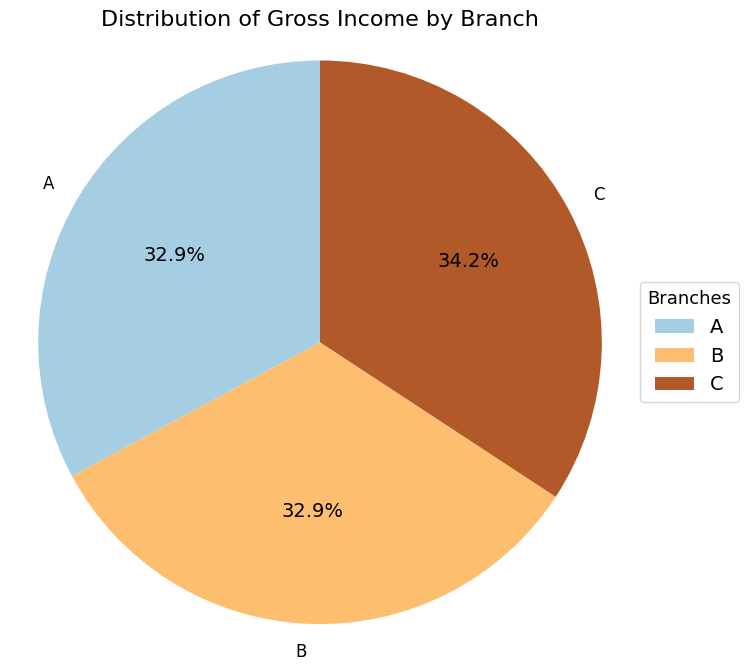

In [20]:
# Group the data by 'Branch' and sum the sales
branch_sales = df.groupby('Branch')['gross income'].sum()

# Creating the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size for better visibility
pie_wedges = plt.pie(branch_sales, labels=branch_sales.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired(np.linspace(0, 1, len(branch_sales))))
plt.title('Distribution of Gross Income by Branch')  # Adding a title to the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a legend to the pie chart
plt.legend(pie_wedges[0], branch_sales.index, title="Branches", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.savefig('Distribution_of_Gross_Income.png')
# Display the plot
plt.show()

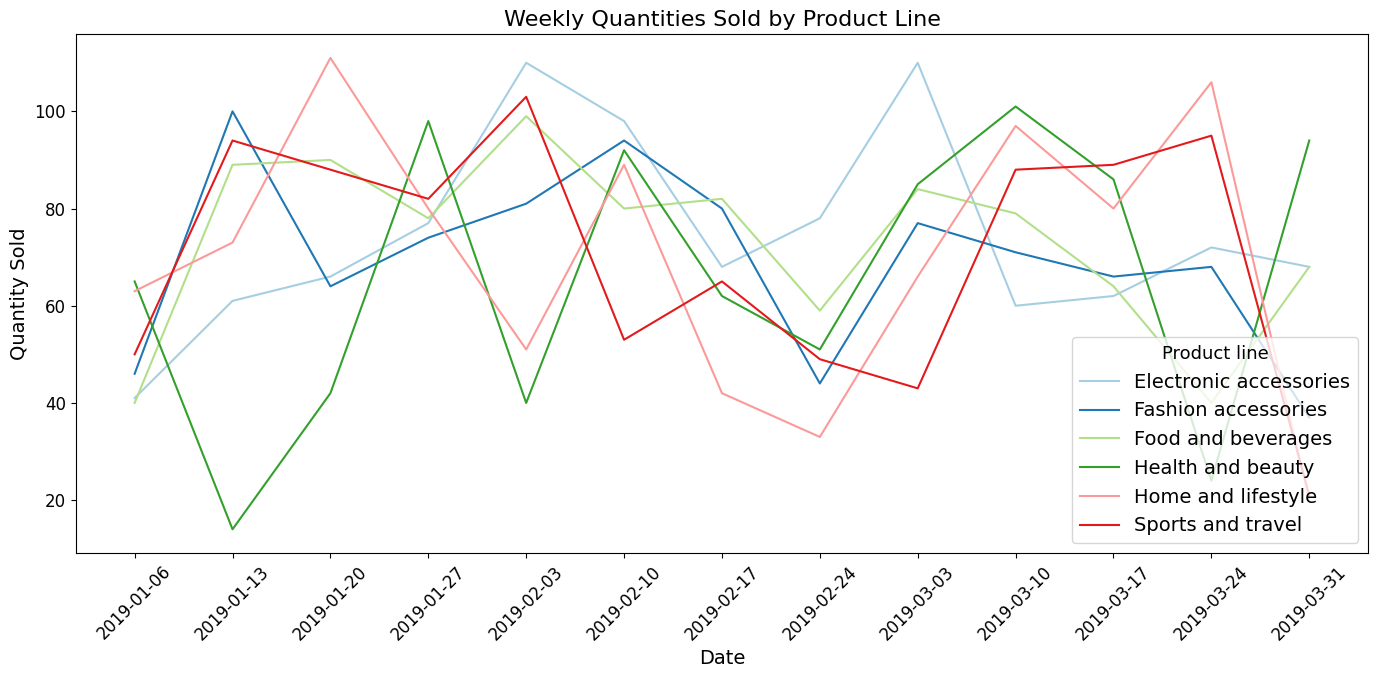

In [21]:
# Convert 'Date' to datetime if it's not already
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as the index
df.set_index('Date', inplace=True)

# Resample data by week and sum quantities. 'W' indicates weekly frequency.
weekly_sales = df.groupby(['Product line']).resample('W')['Quantity'].sum().reset_index()

# Create the lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_sales, x='Date', y='Quantity', hue='Product line', palette='Paired')

# Define the date format for the x-axis
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.SUNDAY))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Improve readability by rotating date labels
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Weekly Quantities Sold by Product Line')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Weekly_Quantities.png')
plt.show()

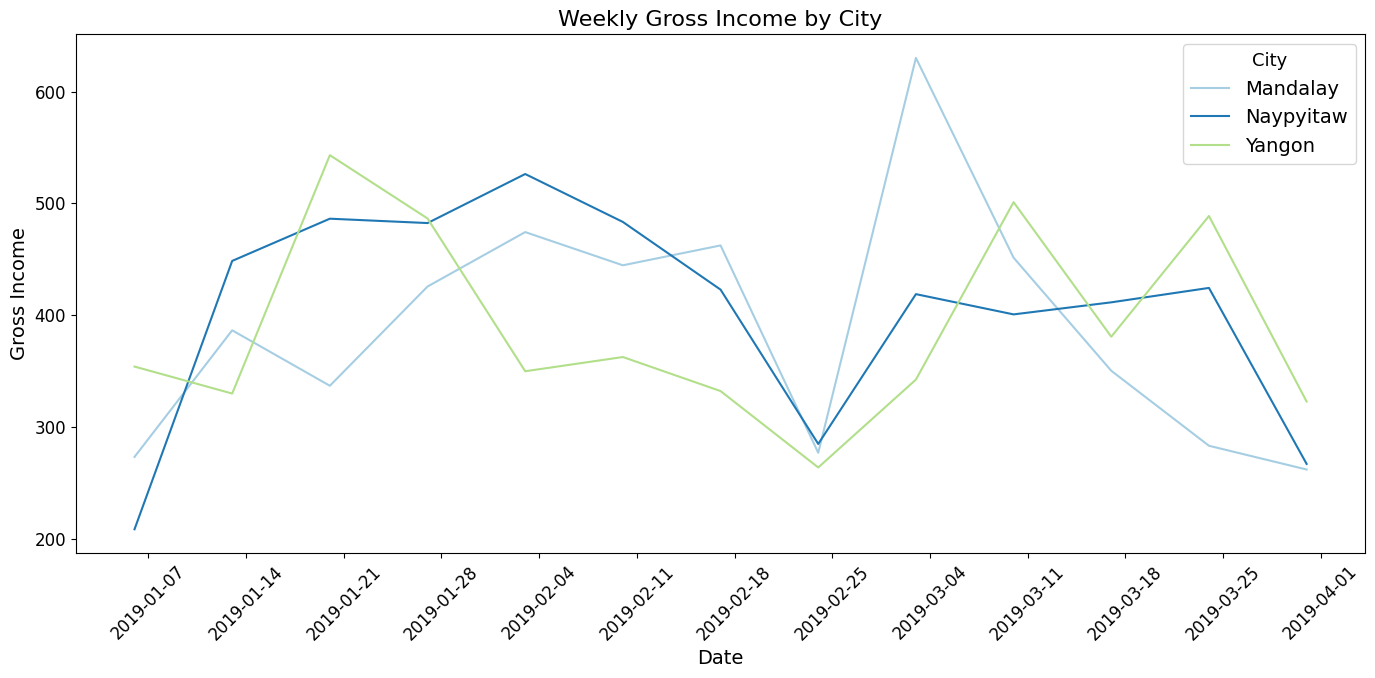

In [22]:
# Resample data by week and sum the 'Gross income'. 'W' indicates weekly frequency.
weekly_gross_income = df.groupby('City').resample('W')['gross income'].sum().reset_index()

# Create the lineplot
plt.figure(figsize=(14, 7))
sns.lineplot(data=weekly_gross_income, x='Date', y='gross income', hue='City', palette='Paired')

# Define the date format for the x-axis
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))  # Here, you can choose the day of the week that works best for you
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Improve readability by rotating date labels
plt.xticks(rotation=45)

# Adding title and labels
plt.title('Weekly Gross Income by City')
plt.xlabel('Date')
plt.ylabel('Gross Income')

# Adjust layout and show plot
plt.tight_layout()
plt.savefig('Weekly_Gross_Income.png')
plt.show()

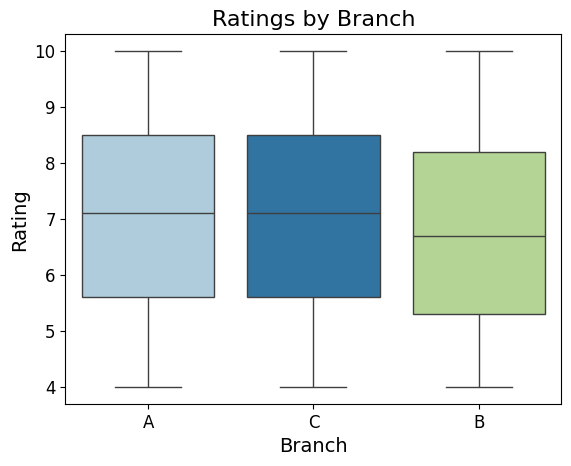

In [23]:
sns.boxplot(x="Branch", y = "Rating" , data =df , hue = 'Branch', palette='Paired').set_title("Ratings by Branch")
plt.savefig('Ratings_by_Branch.png')
plt.show()


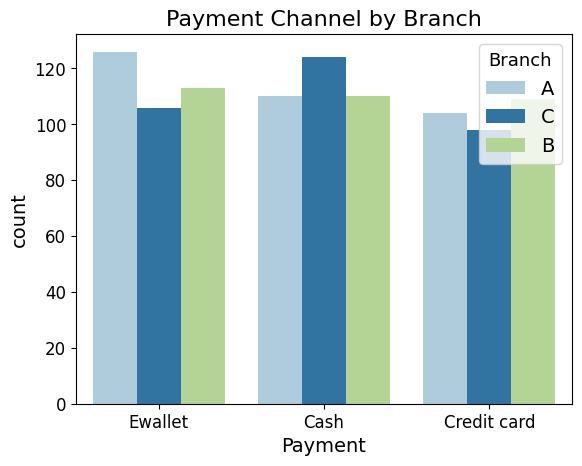

In [24]:
 sns.countplot(x="Payment", data =df , hue = 'Branch', palette='Paired').set_title("Payment Channel by Branch")
 plt.savefig('Payment_Channel_by_Branch.png')
 plt.show()